In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# import warnings
import warnings
warnings.filterwarnings("ignore")

# label encoding 
from sklearn import preprocessing

# scaling data
from sklearn.preprocessing import StandardScaler

# train test split
from sklearn.model_selection import train_test_split

# Evaluation matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# models
from sklearn.linear_model import LogisticRegression
from sklearn import metrics # for AUC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import VotingClassifier

#importing pickle for saving model
import pickle

In [3]:
# importing data set:
diabeties=pd.read_csv(r"C:\Users\VISHAL\Web Deployment\Diabeties\data\diabetes.csv",header=0)
print(diabeties.shape)
diabeties.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabeties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabeties.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabeties.drop(["DiabetesPedigreeFunction"],axis=1,inplace=True)

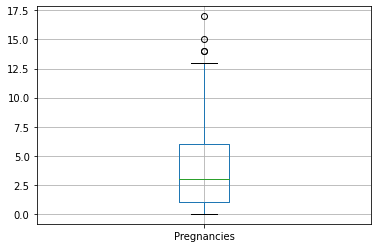

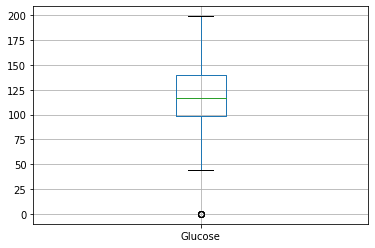

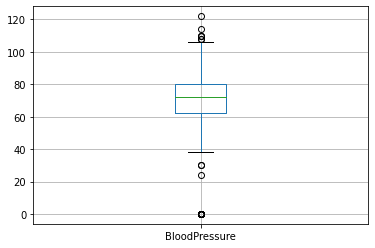

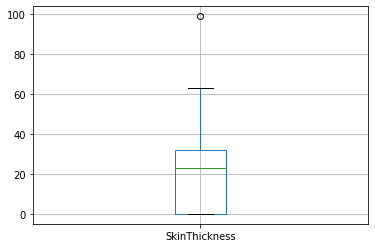

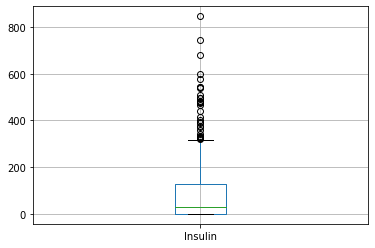

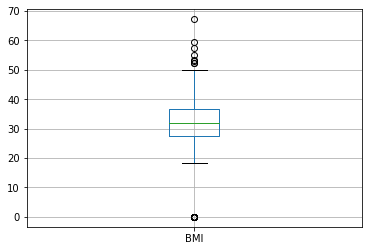

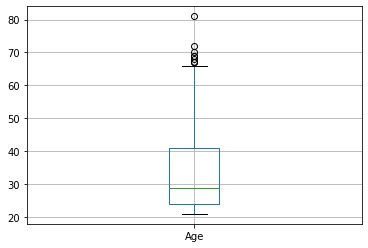

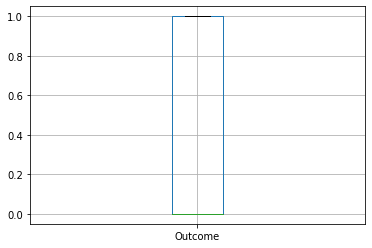

In [7]:
for i in diabeties.columns:
    diabeties.boxplot(column=i)
    plt.show()

In [8]:
diabeties.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Outcome'],
      dtype='object')

(764, 8)
(4, 8)
-6.5
3
(768, 8)


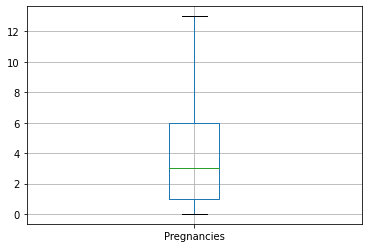

In [9]:
#for value in colname:
q1 = diabeties['Pregnancies'].quantile(0.25) #first quartile value
q3 = diabeties['Pregnancies'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

diabeties_include = diabeties.loc[(diabeties['Pregnancies'] >= low) & \
                                (diabeties['Pregnancies'] <= high)] # meeting the acceptable range
diabeties_exclude = diabeties.loc[(diabeties['Pregnancies'] < low) | (diabeties['Pregnancies'] > high)] #not meeting the acceptable range

print(diabeties_include.shape)
print(diabeties_exclude.shape)

print(low)

Pregnancies_mean=int(diabeties_include.Pregnancies.mean()) #finding the mean of the acceptable range
print(Pregnancies_mean)

#imputing outlier values with mean value
diabeties_exclude.Pregnancies=Pregnancies_mean

#getting back the original shape of df
diabeties_rev1=pd.concat([diabeties_include,diabeties_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(diabeties_rev1.shape)

diabeties_rev1.boxplot(column="Pregnancies")
plt.show()

(723, 8)
(45, 8)
35.0
72
(768, 8)


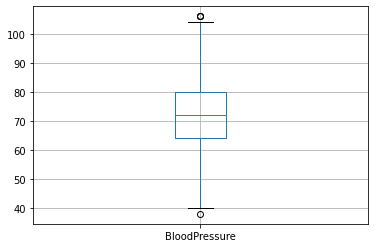

In [10]:
#for value in colname:
q1 = diabeties_rev1['BloodPressure'].quantile(0.25) #first quartile value
q3 = diabeties_rev1['BloodPressure'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

diabeties_rev1_include = diabeties_rev1.loc[(diabeties_rev1['BloodPressure'] >= low) & \
                                (diabeties_rev1['BloodPressure'] <= high)] # meeting the acceptable range
diabeties_rev1_exclude = diabeties_rev1.loc[(diabeties_rev1['BloodPressure'] < low) | (diabeties_rev1['BloodPressure'] > high)] #not meeting the acceptable range

print(diabeties_rev1_include.shape)
print(diabeties_rev1_exclude.shape)

print(low)

BloodPressure_mean=int(diabeties_rev1_include.BloodPressure.mean()) #finding the mean of the acceptable range
print(BloodPressure_mean)

#imputing outlier values with mean value
diabeties_rev1_exclude.BloodPressure=BloodPressure_mean

#getting back the original shape of df
diabeties_rev2=pd.concat([diabeties_rev1_include,diabeties_rev1_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(diabeties_rev2.shape)

diabeties_rev2.boxplot(column=["BloodPressure"])
plt.show()

(734, 8)
(34, 8)
-190.875
62
(768, 8)


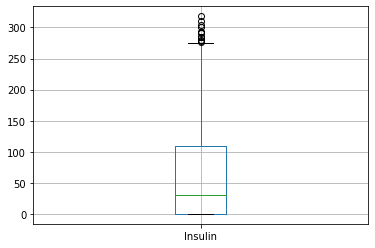

In [11]:
#for value in colname:
q1 = diabeties_rev2['Insulin'].quantile(0.25) #first quartile value
q3 = diabeties_rev2['Insulin'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

diabeties_rev2_include = diabeties_rev2.loc[(diabeties_rev2['Insulin'] >= low) & \
                                (diabeties_rev2['Insulin'] <= high)] # meeting the acceptable range
diabeties_rev2_exclude = diabeties_rev2.loc[(diabeties_rev2['Insulin'] < low) | (diabeties_rev2['Insulin'] > high)] #not meeting the acceptable range

print(diabeties_rev2_include.shape)
print(diabeties_rev2_exclude.shape)

print(low)

Insulin_mean=int(diabeties_rev2_include.Insulin.mean()) #finding the mean of the acceptable range
print(Insulin_mean)

#imputing outlier values with mean value
diabeties_rev2_exclude.Insulin=Insulin_mean

#getting back the original shape of df
diabeties_rev=pd.concat([diabeties_rev2_include,diabeties_rev2_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(diabeties_rev.shape)

diabeties_rev.boxplot(column=["Insulin"])
plt.show()

In [12]:
# #for value in colname:
# q1 = diabeties_rev3['DiabetesPedigreeFunction'].quantile(0.25) #first quartile value
# q3 = diabeties_rev3['DiabetesPedigreeFunction'].quantile(0.75) # third quartile value
# iqr = q3-q1 #Interquartile range
# low  = q1-1.5*iqr #acceptable range
# high = q3+1.5*iqr #acceptable range

# diabeties_rev3_include = diabeties_rev3.loc[(diabeties_rev3['DiabetesPedigreeFunction'] >= low) & \
#                                 (diabeties_rev3['DiabetesPedigreeFunction'] <= high)] # meeting the acceptable range
# diabeties_rev3_exclude = diabeties_rev3.loc[(diabeties_rev3['DiabetesPedigreeFunction'] < low) | (diabeties_rev3['DiabetesPedigreeFunction'] > high)] #not meeting the acceptable range

# print(diabeties_rev3_include.shape)
# print(diabeties_rev3_exclude.shape)

# print(low)

# DiabetesPedigreeFunction_mean=int(diabeties_rev3_include.DiabetesPedigreeFunction.mean()) #finding the mean of the acceptable range
# print(DiabetesPedigreeFunction_mean)

# #imputing outlier values with mean value
# diabeties_rev3_exclude.DiabetesPedigreeFunction=DiabetesPedigreeFunction_mean

# #getting back the original shape of df
# diabeties_rev=pd.concat([diabeties_rev3_include,diabeties_rev3_exclude],axis=0) #concatenating both dfs to get 
# #the original shape
# print(diabeties_rev.shape)

# diabeties_rev.boxplot(column=["DiabetesPedigreeFunction"])
# plt.show()

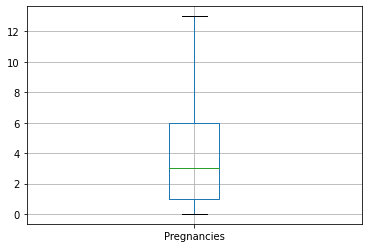

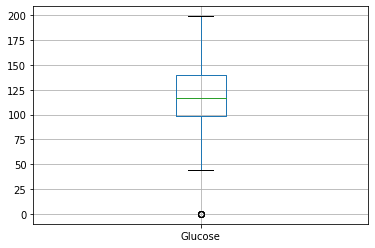

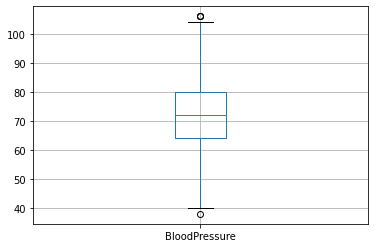

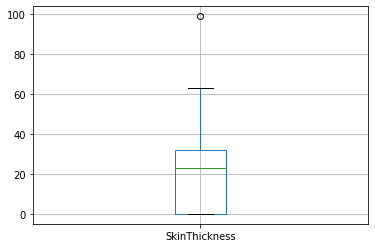

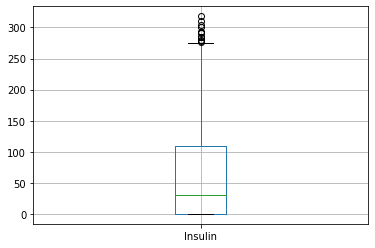

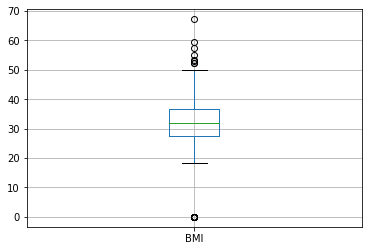

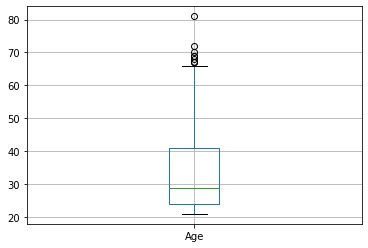

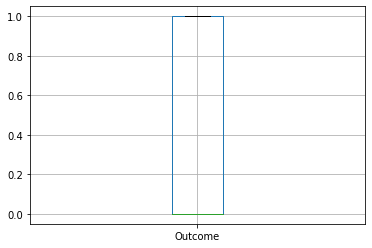

In [13]:
for i in diabeties.columns:
    diabeties_rev.boxplot(column=i)
    plt.show()

In [14]:
diabeties_rev.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


### Splitting Data

In [15]:
X = diabeties_rev.values[:,0:-1]
Y = diabeties_rev.values[:,-1]

In [16]:
scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[ 0.67842689  0.84832379 -0.01765027 ... -0.80604169  0.20401277
   1.4259954 ]
 [-0.85132017 -1.12339636 -0.55627586 ... -0.80604169 -0.68442195
  -0.19067191]
 [ 1.29032571  1.94372388 -0.73581772 ... -0.80604169 -1.10325546
  -0.10558415]
 ...
 [-0.23942135  1.16129525 -0.73581772 ... -0.00405909 -0.10059342
  -0.78628618]
 [ 0.9843763   2.06891246 -1.99261076 ... -0.00405909  0.24208854
   0.06459135]
 [-1.15726958  1.88112959  1.41868462 ... -0.00405909  1.43512945
  -0.61611067]]


In [17]:
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [18]:
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))
print()
print(list(zip(diabeties.columns[:-1],classifier.coef_.ravel())))
#print(classifier.intercept_)

[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.

In [19]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[86 11]
 [30 27]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81        97
         1.0       0.71      0.47      0.57        57

    accuracy                           0.73       154
   macro avg       0.73      0.68      0.69       154
weighted avg       0.73      0.73      0.72       154

Accuracy of the model:  0.7337662337662337


### Log Model Tunning

In [20]:
# store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.95244058 0.04755942]
 [0.35957072 0.64042928]
 [0.91014154 0.08985846]
 [0.37647615 0.62352385]
 [0.93894203 0.06105797]
 [0.94225458 0.05774542]
 [0.67934569 0.32065431]
 [0.58530398 0.41469602]
 [0.97044288 0.02955712]
 [0.98216568 0.01783432]
 [0.92481299 0.07518701]
 [0.86064102 0.13935898]
 [0.94986075 0.05013925]
 [0.99770919 0.00229081]
 [0.71899934 0.28100066]
 [0.87456339 0.12543661]
 [0.74450776 0.25549224]
 [0.93296298 0.06703702]
 [0.9318372  0.0681628 ]
 [0.93322728 0.06677272]
 [0.51017878 0.48982122]
 [0.62163874 0.37836126]
 [0.66287053 0.33712947]
 [0.93723836 0.06276164]
 [0.56377943 0.43622057]
 [0.91786237 0.08213763]
 [0.79355518 0.20644482]
 [0.75334003 0.24665997]
 [0.85473648 0.14526352]
 [0.66117016 0.33882984]
 [0.91677731 0.08322269]
 [0.04672437 0.95327563]
 [0.46375733 0.53624267]
 [0.85601792 0.14398208]
 [0.6022782  0.3977218 ]
 [0.94679048 0.05320952]
 [0.94670267 0.05329733]
 [0.93536734 0.06463266]
 [0.87570138 0.12429862]
 [0.96252573 0.03747427]


In [21]:
for a in np.arange(0.3,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.3 : 39  , type 2 error : 14  , type 1 error: 25
Errors at threshold  0.31 : 39  , type 2 error : 15  , type 1 error: 24
Errors at threshold  0.32 : 41  , type 2 error : 17  , type 1 error: 24
Errors at threshold  0.33 : 40  , type 2 error : 18  , type 1 error: 22
Errors at threshold  0.34 : 41  , type 2 error : 20  , type 1 error: 21
Errors at threshold  0.35000000000000003 : 40  , type 2 error : 20  , type 1 error: 20
Errors at threshold  0.36000000000000004 : 39  , type 2 error : 20  , type 1 error: 19
Errors at threshold  0.37000000000000005 : 40  , type 2 error : 21  , type 1 error: 19
Errors at threshold  0.38000000000000006 : 43  , type 2 error : 24  , type 1 error: 19
Errors at threshold  0.39000000000000007 : 43  , type 2 error : 25  , type 1 error: 18
Errors at threshold  0.4000000000000001 : 41  , type 2 error : 26  , type 1 error: 15
Errors at threshold  0.4100000000000001 : 42  , type 2 error : 27  , type 1 error: 15
Errors at threshold  0.42000000000

In [22]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.4:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]


In [23]:
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[82 15]
 [26 31]]
Accuracy of the model:  0.7337662337662337
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80        97
         1.0       0.67      0.54      0.60        57

    accuracy                           0.73       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154



In [24]:
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)

print(auc)

0.8140712606257913


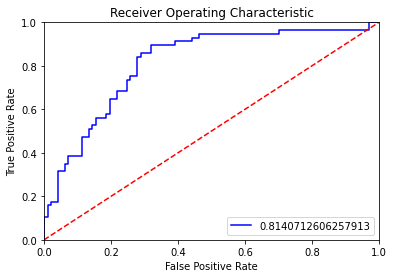

In [25]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

### SGD

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [27]:
classifier_SGD=SGDClassifier(loss="log",random_state=10,alpha=0.01,max_iter=1000, shuffle=True,
                         early_stopping=True,n_iter_no_change=3)
classifier_SGD.fit(X_train,Y_train)


Y_pred=classifier_SGD.predict(X_test)
print(list(zip(diabeties_rev.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)

[('Pregnancies', 0.3473104482397146), ('Glucose', 1.1481689452193018), ('BloodPressure', -0.03724733238798797), ('SkinThickness', -0.08533845326313103), ('Insulin', 0.06673676513871471), ('BMI', 0.6221310435203784), ('Age', 0.1189719323327322)]
[-0.93665378]


In [28]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

[[88  9]
 [31 26]]
Accuracy of the model:  0.7402597402597403
Classification report: 
              precision    recall  f1-score   support

         0.0       0.74      0.91      0.81        97
         1.0       0.74      0.46      0.57        57

    accuracy                           0.74       154
   macro avg       0.74      0.68      0.69       154
weighted avg       0.74      0.74      0.72       154



## Tune SGD Classifier

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [30]:
classifier_SGD_tune=SGDClassifier(loss="log",random_state=10,alpha=0.01,max_iter=1000, shuffle=True,
                             early_stopping=True, n_iter_no_change=2)

classifier_SGD_tune.fit(X_train,Y_train)

Y_pred=classifier_SGD_tune.predict(X_test)
print(list(zip(diabeties_rev.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)

[('Pregnancies', 0.3473104482397146), ('Glucose', 1.1481689452193018), ('BloodPressure', -0.03724733238798797), ('SkinThickness', -0.08533845326313103), ('Insulin', 0.06673676513871471), ('BMI', 0.6221310435203784), ('Age', 0.1189719323327322)]
[-0.93665378]


In [31]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

[[85 12]
 [27 30]]
Accuracy of the model:  0.7467532467532467
Classification report: 
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.81        97
         1.0       0.71      0.53      0.61        57

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



In [32]:
# store the predicted probabilities
y_pred_prob = classifier_SGD_tune.predict_proba(X_test)
print(y_pred_prob)

[[0.95808751 0.04191249]
 [0.31609541 0.68390459]
 [0.92368379 0.07631621]
 [0.1790634  0.8209366 ]
 [0.95174437 0.04825563]
 [0.95506803 0.04493197]
 [0.66009018 0.33990982]
 [0.56450009 0.43549991]
 [0.98346935 0.01653065]
 [0.959345   0.040655  ]
 [0.92634773 0.07365227]
 [0.87543911 0.12456089]
 [0.96020446 0.03979554]
 [0.99854962 0.00145038]
 [0.73617893 0.26382107]
 [0.8811615  0.1188385 ]
 [0.73241697 0.26758303]
 [0.93768044 0.06231956]
 [0.92333169 0.07666831]
 [0.94716747 0.05283253]
 [0.52242381 0.47757619]
 [0.61922253 0.38077747]
 [0.47443961 0.52556039]
 [0.9515007  0.0484993 ]
 [0.48020539 0.51979461]
 [0.93115255 0.06884745]
 [0.80316034 0.19683966]
 [0.72455977 0.27544023]
 [0.8686498  0.1313502 ]
 [0.67101561 0.32898439]
 [0.89950565 0.10049435]
 [0.01913335 0.98086665]
 [0.40540919 0.59459081]
 [0.85471586 0.14528414]
 [0.57846765 0.42153235]
 [0.94198679 0.05801321]
 [0.95426946 0.04573054]
 [0.9421293  0.0578707 ]
 [0.88724993 0.11275007]
 [0.97395795 0.02604205]


In [33]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 44  , type 2 error : 23  , type 1 error: 21
Errors at threshold  0.41000000000000003 : 42  , type 2 error : 23  , type 1 error: 19
Errors at threshold  0.42000000000000004 : 43  , type 2 error : 24  , type 1 error: 19
Errors at threshold  0.43000000000000005 : 42  , type 2 error : 24  , type 1 error: 18
Errors at threshold  0.44000000000000006 : 41  , type 2 error : 24  , type 1 error: 17
Errors at threshold  0.45000000000000007 : 39  , type 2 error : 24  , type 1 error: 15
Errors at threshold  0.4600000000000001 : 39  , type 2 error : 25  , type 1 error: 14
Errors at threshold  0.4700000000000001 : 39  , type 2 error : 25  , type 1 error: 14
Errors at threshold  0.4800000000000001 : 39  , type 2 error : 26  , type 1 error: 13
Errors at threshold  0.4900000000000001 : 38  , type 2 error : 26  , type 1 error: 12
Errors at threshold  0.5000000000000001 : 39  , type 2 error : 27  , type 1 error: 12
Errors at threshold  0.5100000000000001 : 39  , type 2 error : 2

## KNN

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [35]:
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean')

model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)

In [36]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[90  7]
 [40 17]]
0.6948051948051948
              precision    recall  f1-score   support

         0.0       0.69      0.93      0.79        97
         1.0       0.71      0.30      0.42        57

    accuracy                           0.69       154
   macro avg       0.70      0.61      0.61       154
weighted avg       0.70      0.69      0.65       154



## Tune KNN

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [38]:
model_KNN_tune=KNeighborsClassifier(n_neighbors=25,metric='euclidean')

model_KNN_tune.fit(X_train,Y_train)
Y_pred=model_KNN_tune.predict(X_test)

In [39]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[90  7]
 [33 24]]
0.7402597402597403
              precision    recall  f1-score   support

         0.0       0.73      0.93      0.82        97
         1.0       0.77      0.42      0.55        57

    accuracy                           0.74       154
   macro avg       0.75      0.67      0.68       154
weighted avg       0.75      0.74      0.72       154



In [40]:
# store the predicted probabilities
y_pred_prob = model_KNN_tune.predict_proba(X_test)
print(y_pred_prob)

[[0.96 0.04]
 [0.48 0.52]
 [0.92 0.08]
 [0.56 0.44]
 [1.   0.  ]
 [0.96 0.04]
 [0.64 0.36]
 [0.56 0.44]
 [0.96 0.04]
 [0.84 0.16]
 [0.84 0.16]
 [0.88 0.12]
 [1.   0.  ]
 [0.96 0.04]
 [0.76 0.24]
 [0.96 0.04]
 [0.68 0.32]
 [0.8  0.2 ]
 [0.88 0.12]
 [0.88 0.12]
 [0.56 0.44]
 [0.52 0.48]
 [0.48 0.52]
 [0.96 0.04]
 [0.68 0.32]
 [0.92 0.08]
 [0.84 0.16]
 [0.72 0.28]
 [0.8  0.2 ]
 [0.64 0.36]
 [0.72 0.28]
 [0.24 0.76]
 [0.76 0.24]
 [0.76 0.24]
 [0.76 0.24]
 [1.   0.  ]
 [0.96 0.04]
 [0.88 0.12]
 [0.84 0.16]
 [0.88 0.12]
 [0.52 0.48]
 [0.88 0.12]
 [0.96 0.04]
 [0.48 0.52]
 [0.52 0.48]
 [0.28 0.72]
 [0.88 0.12]
 [0.88 0.12]
 [0.72 0.28]
 [0.6  0.4 ]
 [0.84 0.16]
 [0.24 0.76]
 [0.96 0.04]
 [0.88 0.12]
 [0.36 0.64]
 [0.56 0.44]
 [0.6  0.4 ]
 [0.88 0.12]
 [0.92 0.08]
 [0.88 0.12]
 [0.48 0.52]
 [0.88 0.12]
 [0.76 0.24]
 [0.84 0.16]
 [0.8  0.2 ]
 [0.84 0.16]
 [0.36 0.64]
 [0.8  0.2 ]
 [0.92 0.08]
 [0.76 0.24]
 [0.72 0.28]
 [0.68 0.32]
 [0.92 0.08]
 [0.32 0.68]
 [0.68 0.32]
 [0.48 0.52]
 [0.32 0.68]

In [41]:
for a in np.arange(0.3,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.3 : 42  , type 2 error : 13  , type 1 error: 29
Errors at threshold  0.31 : 42  , type 2 error : 13  , type 1 error: 29
Errors at threshold  0.32 : 36  , type 2 error : 15  , type 1 error: 21
Errors at threshold  0.33 : 36  , type 2 error : 15  , type 1 error: 21
Errors at threshold  0.34 : 36  , type 2 error : 15  , type 1 error: 21
Errors at threshold  0.35000000000000003 : 36  , type 2 error : 15  , type 1 error: 21
Errors at threshold  0.36000000000000004 : 36  , type 2 error : 18  , type 1 error: 18
Errors at threshold  0.37000000000000005 : 36  , type 2 error : 18  , type 1 error: 18
Errors at threshold  0.38000000000000006 : 36  , type 2 error : 18  , type 1 error: 18
Errors at threshold  0.39000000000000007 : 36  , type 2 error : 18  , type 1 error: 18
Errors at threshold  0.4000000000000001 : 39  , type 2 error : 23  , type 1 error: 16
Errors at threshold  0.4100000000000001 : 39  , type 2 error : 23  , type 1 error: 16
Errors at threshold  0.42000000000

In [42]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.39:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]


In [43]:
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

print(classification_report(Y_test, y_pred_class))

[[79 18]
 [18 39]]
Accuracy of the model:  0.7662337662337663
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        97
         1.0       0.68      0.68      0.68        57

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



## SVM

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [45]:
svc_model=svm.SVC(kernel='rbf',C=10.0,gamma=0.001)

svc_model.fit(X_train, Y_train)

Y_pred=svc_model.predict(X_test)

print(list(Y_pred))

[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [46]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[86 11]
 [35 22]]
0.7012987012987013
              precision    recall  f1-score   support

         0.0       0.71      0.89      0.79        97
         1.0       0.67      0.39      0.49        57

    accuracy                           0.70       154
   macro avg       0.69      0.64      0.64       154
weighted avg       0.69      0.70      0.68       154



## Tune SVM

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [48]:
model_SVC_tune=svm.SVC(kernel="rbf", gamma=0.001, C=50)

model_SVC_tune.fit(X_train,Y_train)

Y_pred=model_SVC_tune.predict(X_test)

In [49]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[85 12]
 [30 27]]
0.7272727272727273
              precision    recall  f1-score   support

         0.0       0.74      0.88      0.80        97
         1.0       0.69      0.47      0.56        57

    accuracy                           0.73       154
   macro avg       0.72      0.67      0.68       154
weighted avg       0.72      0.73      0.71       154



## Decision Tree

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [51]:
model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")

model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]


In [52]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[77 20]
 [24 33]]
0.7142857142857143
              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78        97
         1.0       0.62      0.58      0.60        57

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



## Tune Decision Tree

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [54]:
model_DecisionTree_tune=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best",
                                         min_samples_leaf=12,max_depth=25,min_samples_split=3,
                                         max_leaf_nodes=1000)

model_DecisionTree_tune.fit(X_train,Y_train)
Y_pred=model_DecisionTree_tune.predict(X_test)
print(Y_pred)

[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]


In [55]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[84 13]
 [24 33]]
0.7597402597402597
              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82        97
         1.0       0.72      0.58      0.64        57

    accuracy                           0.76       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.76      0.75       154



In [56]:
# store the predicted probabilities
y_pred_prob = model_DecisionTree_tune.predict_proba(X_test)
print(y_pred_prob)

[[1.         0.        ]
 [0.47619048 0.52380952]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.5        0.5       ]
 [0.58333333 0.41666667]
 [0.84615385 0.15384615]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.41666667 0.58333333]
 [1.         0.        ]
 [0.71428571 0.28571429]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.41666667 0.58333333]
 [0.5        0.5       ]
 [0.44444444 0.55555556]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [0.58333333 0.41666667]
 [0.58333333 0.41666667]
 [0.84615385 0.15384615]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [0.16666667 0.83333333]
 [0.88888889 0.11111111]
 [0.44444444 0.55555556]
 [0.58333333 0.41666667]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.76470588 0.23529412]


In [57]:
for a in np.arange(0.3,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.3 : 43  , type 2 error : 13  , type 1 error: 30
Errors at threshold  0.31 : 44  , type 2 error : 14  , type 1 error: 30
Errors at threshold  0.32 : 44  , type 2 error : 14  , type 1 error: 30
Errors at threshold  0.33 : 44  , type 2 error : 14  , type 1 error: 30
Errors at threshold  0.34 : 39  , type 2 error : 18  , type 1 error: 21
Errors at threshold  0.35000000000000003 : 39  , type 2 error : 18  , type 1 error: 21
Errors at threshold  0.36000000000000004 : 39  , type 2 error : 18  , type 1 error: 21
Errors at threshold  0.37000000000000005 : 39  , type 2 error : 18  , type 1 error: 21
Errors at threshold  0.38000000000000006 : 39  , type 2 error : 18  , type 1 error: 21
Errors at threshold  0.39000000000000007 : 39  , type 2 error : 18  , type 1 error: 21
Errors at threshold  0.4000000000000001 : 39  , type 2 error : 18  , type 1 error: 21
Errors at threshold  0.4100000000000001 : 39  , type 2 error : 18  , type 1 error: 21
Errors at threshold  0.42000000000

In [58]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.49:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0]


In [59]:
print(confusion_matrix(Y_test,y_pred_class))
print(accuracy_score(Y_test,y_pred_class))
print(classification_report(Y_test,y_pred_class))

[[84 13]
 [20 37]]
0.7857142857142857
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84        97
         1.0       0.74      0.65      0.69        57

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



## Random Forest

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [71]:
model_RandomForest=RandomForestClassifier(n_estimators=10, random_state=10)

model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [72]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[86 11]
 [30 27]]
0.7337662337662337
              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81        97
         1.0       0.71      0.47      0.57        57

    accuracy                           0.73       154
   macro avg       0.73      0.68      0.69       154
weighted avg       0.73      0.73      0.72       154



## Tune Random Forest

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [74]:
model_RandomForest_tune=RandomForestClassifier(n_estimators=11, random_state=10)

model_RandomForest_tune.fit(X_train,Y_train)

Y_pred=model_RandomForest_tune.predict(X_test)

In [75]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[84 13]
 [26 31]]
0.7467532467532467
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81        97
         1.0       0.70      0.54      0.61        57

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



## Ensemble Modelling

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [67]:
estimators = []
model1 = LogisticRegression()
estimators.append(('log', model1))



model2=SGDClassifier(loss="log",random_state=10,alpha=0.01,max_iter=1000, shuffle=True,early_stopping=True, 
                     n_iter_no_change=2)
estimators.append(('sgd', model2))



model3 = KNeighborsClassifier(n_neighbors=25,metric='euclidean')
estimators.append(('knn', model3))



# model4 = svm.SVC(kernel="rbf", gamma=0.001, C=50)
# estimators.append(('svm', model4))



model5 = DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best",min_samples_leaf=12,max_depth=25
                                ,min_samples_split=3,max_leaf_nodes=1000)
estimators.append(('cart', model5))



model6=RandomForestClassifier(n_estimators=11, random_state=10)
estimators.append(('rt', model6))



# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
print(Y_pred)

[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]


In [68]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[87 10]
 [24 33]]
0.7792207792207793
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84        97
         1.0       0.77      0.58      0.66        57

    accuracy                           0.78       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



## K-Fold Validation

In [69]:
model_DecisionTree_tune=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best",
                                         min_samples_leaf=12,max_depth=25,min_samples_split=3,
                                         max_leaf_nodes=1000)

#performing kfold_cross_validation
kfold_cv=KFold(n_splits=7,random_state=10)
#print(kfold_cv)

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=model_DecisionTree_tune,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)

#finding the mean
print(kfold_cv_result.mean())

[0.75       0.80681818 0.77272727 0.71590909 0.71590909 0.81609195
 0.68965517]
0.7524443946857738


## Dumping all Models

In [77]:
## saving model:
pickle.dump(classifier,open(r'C:\Users\VISHAL\Web Deployment\Diabeties\models\log.pkl','wb'))
pickle.dump(classifier_SGD,open(r'C:\Users\VISHAL\Web Deployment\Diabeties\models\sgd.pkl','wb'))
pickle.dump(classifier_SGD_tune,open(r'C:\Users\VISHAL\Web Deployment\Diabeties\models\sgd_tune.pkl','wb'))
pickle.dump(model_KNN,open(r'C:\Users\VISHAL\Web Deployment\Diabeties\models\knn.pkl','wb'))
pickle.dump(model_KNN_tune,open(r'C:\Users\VISHAL\Web Deployment\Diabeties\models\knn_tune.pkl','wb'))
pickle.dump(svc_model,open(r'C:\Users\VISHAL\Web Deployment\Diabeties\models\svc.pkl','wb'))
pickle.dump(model_SVC_tune,open(r'C:\Users\VISHAL\Web Deployment\Diabeties\models\svc_tune.pkl','wb'))
pickle.dump(model_DecisionTree,open(r'C:\Users\VISHAL\Web Deployment\Diabeties\models\dt.pkl','wb'))
pickle.dump(model_DecisionTree_tune,open(r'C:\Users\VISHAL\Web Deployment\Diabeties\models\dt_tune.pkl','wb'))
pickle.dump(model_RandomForest,open(r'C:\Users\VISHAL\Web Deployment\Diabeties\models\rt.pkl','wb'))
pickle.dump(model_RandomForest_tune,open(r'C:\Users\VISHAL\Web Deployment\Diabeties\models\rt_tune.pkl','wb'))
pickle.dump(ensemble,open(r'C:\Users\VISHAL\Web Deployment\Diabeties\models\ensemble.pkl','wb'))